In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re

Import Data

In [ ]:
df = pd.read_csv("../data/processed/Fara+500.csv")

List columns for copy and paste :)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'CountyName', 'GEOID', 'TotalPopulation',
       'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev',
       'ARTHRITIS_Crude95CI', 'BINGE_CrudePrev', 'BINGE_Crude95CI',
       'BPHIGH_CrudePrev', 'BPHIGH_Crude95CI', 'BPMED_CrudePrev',
       'BPMED_Crude95CI', 'CANCER_CrudePrev', 'CANCER_Crude95CI',
       'CASTHMA_CrudePrev', 'CASTHMA_Crude95CI', 'CERVICAL_CrudePrev',
       'CERVICAL_Crude95CI', 'CHD_CrudePrev', 'CHD_Crude95CI',
       'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev',
       'CHOLSCREEN_Crude95CI', 'COLON_SCREEN_CrudePrev',
       'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev', 'COPD_Crude95CI',
       'COREM_CrudePrev', 'COREM_Crude95CI', 'COREW_CrudePrev',
       'COREW_Crude95CI', 'CSMOKING_CrudePrev', 'CSMOKING_Crude95CI',
       'DENTAL_CrudePrev', 'DENTAL_Crude95CI', 'DEPRESSION_CrudePrev',
       'DEPRESSION_Crude95CI', 'DIABETES_CrudePrev', 'DIABETES_Crude95CI',
       'GHLTH_CrudePrev', 'GHLTH_Crude95CI', 'HIGH

Correlation matrix for Diabetes Crude Estimate and Low Access Indicators

In [17]:
df.loc[:, ["DIABETES_CrudePrev", "LATracts1", "LATracts10", "LATracts20"]].corr(method="kendall")

,DIABETES_CrudePrev,LATracts1,LATracts10,LATracts20
DIABETES_CrudePrev,1.000000,-0.105495,0.064192,0.030971
LATracts1,-0.105495,1.000000,-0.061488,-0.026085
LATracts10,0.064192,-0.061488,1.000000,0.424233
LATracts20,0.030971,-0.026085,0.424233,1.000000


Correlation and P value between Diabetes Crude Estimate and Uninsured Population + Check for any difference between Scipy Pearson and Pandas Pearson

In [ ]:
corr, p_val = pearsonr(df["DIABETES_CrudePrev"], df["UninsuredPop"])
print(f'Correlation: {corr}, P-Value: {p_val}')
df[["DIABETES_CrudePrev", "UninsuredPop"]].corr(method='pearson')

Correlation: 0.0214465006979221, P-Value: 0.05503069267290367


,DIABETES_CrudePrev,UninsuredPop
DIABETES_CrudePrev,1.000000,0.021447
UninsuredPop,0.021447,1.000000


From this we can conclude that the correlation observed is not statistically significant given the provided data (p-val > 0.05). <br>
Additionally, we can now confidently interchange scipy and pandas pearson

Histogram of Diabetes Crude Estimate between Low Access Low Income Tracts and Not LALI Tracts

<Axes: xlabel='DIABETES_CrudePrev', ylabel='Percent'>

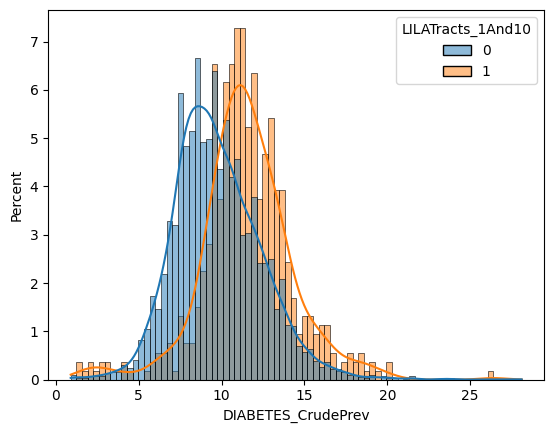

In [11]:
sns.histplot(data=df, x="DIABETES_CrudePrev", hue="LILATracts_1And10", common_norm=False, multiple="layer", kde=True, stat='percent')

Prep prune for large correlation matrix

In [32]:
d_cols = []
for i in df.columns:
    if re.match(string=i, pattern=r'\S*(CI)$'):
        d_cols.append(i)

d_cols.append("Unnamed: 0.1")
d_cols.append("Unnamed: 0")
d_cols.append("CountyName")
d_cols.append("County")
d_cols.append("Geolocation")
d_cols.append("GEOID")

d_cols

['ACCESS2_Crude95CI',
 'ARTHRITIS_Crude95CI',
 'BINGE_Crude95CI',
 'BPHIGH_Crude95CI',
 'BPMED_Crude95CI',
 'CANCER_Crude95CI',
 'CASTHMA_Crude95CI',
 'CERVICAL_Crude95CI',
 'CHD_Crude95CI',
 'CHECKUP_Crude95CI',
 'CHOLSCREEN_Crude95CI',
 'COLON_SCREEN_Crude95CI',
 'COPD_Crude95CI',
 'COREM_Crude95CI',
 'COREW_Crude95CI',
 'CSMOKING_Crude95CI',
 'DENTAL_Crude95CI',
 'DEPRESSION_Crude95CI',
 'DIABETES_Crude95CI',
 'GHLTH_Crude95CI',
 'HIGHCHOL_Crude95CI',
 'KIDNEY_Crude95CI',
 'LPA_Crude95CI',
 'MAMMOUSE_Crude95CI',
 'MHLTH_Crude95CI',
 'OBESITY_Crude95CI',
 'PHLTH_Crude95CI',
 'SLEEP_Crude95CI',
 'STROKE_Crude95CI',
 'TEETHLOST_Crude95CI',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'CountyName',
 'County',
 'Geolocation',
 'GEOID']

In [34]:
corr_df = df.drop(columns=d_cols)

In [ ]:
cols: list = corr_df.columns.to_list()
si = {}
while len(cols) != 0:
    ptr = cols[0]
    for i in cols[1:]:
        corr, p = pearsonr(corr_df[ptr], corr_df[i])
        if p <= 0.05:
            si[f"{ptr}, {i}"] = (corr, p)
    cols.pop(0)
    
si

{'TotalPopulation, GHLTH_CrudePrev': (np.float64(0.014193198159746198),
  np.float64(0.20420534208358535)),
 'TotalPopulation, LowIncomeTracts': (np.float64(-0.015625065506566446),
  np.float64(0.16218374372936253)),
 'ACCESS2_CrudePrev, LATracts20': (np.float64(0.0008868562216509425),
  np.float64(0.9367699192437369)),
 'ACCESS2_CrudePrev, LALOWI1_10': (np.float64(0.016297358852763594),
  np.float64(0.14486437110198735)),
 'ACCESS2_CrudePrev, LALOWI1_20': (np.float64(0.015585726590300594),
  np.float64(0.16324359448337575)),
 'ARTHRITIS_CrudePrev, GHLTH_CrudePrev': (np.float64(0.014572778981525897),
  np.float64(0.1923630467121403)),
 'ARTHRITIS_CrudePrev, LPA_CrudePrev': (np.float64(-0.01983801310253705),
  np.float64(0.07594631136302185)),
 'ARTHRITIS_CrudePrev, LILATracts_halfAnd10': (np.float64(0.01932905600129045),
  np.float64(0.08377922346334928)),
 'ARTHRITIS_CrudePrev, LALOWI05_10': (np.float64(0.0051449860774465134),
  np.float64(0.6453527684185226)),
 'BINGE_CrudePrev, MHLT